# T-Test

T-test is the statistical test which is used to find the significant difference between the mean of the 2 groups or 2 samples.

We can also test whether the sample mean is the estimate of the population mean or not. if the sample size is small (say <30)
and the population standard deviation is unknown.

The distribution of the population should be normal

# One sample T-test

The one sample t test basically test whether the sample mean is the estimate of the population mean.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(6)
school_weight=stats.poisson.rvs(loc=40,mu=70,size=4000)   #population distribution 
class_weight=stats.poisson.rvs(loc=45,mu=75,size=60)      #Sample distribution

[Text(0.5, 1.0, 'class_weight')]

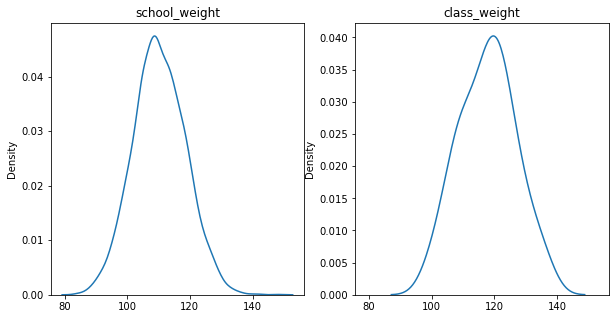

In [3]:
fig, axes = plt.subplots(1, 2,sharex=True,figsize=(10, 5))
sns.kdeplot(data=school_weight,ax=axes[0]).set(title="school_weight")
sns.kdeplot(data=class_weight,ax=axes[1]).set(title="class_weight")

In [4]:
print(school_weight.mean())       #population mean

110.28925


In [5]:
print(class_weight.mean())        #sample mean   

117.8


Now the task is to test whether this sample mean is the estimate of the population mean. Assume that population standard deviation is not given.

## H0 : Sample_mean = Population_mean

## H1 : Sample_mean != Population_mean

## The test will be carried out with 95% confidence interval and 5% level of significance.

In [6]:
ttest,p_value=stats.ttest_1samp(a=class_weight,popmean=school_weight.mean())

Here in the above statement from scipy.stats it calculates the ttest value and p value. It has 2 parameters they are sample values and the population mean.

In [7]:
print(ttest)

6.486932409023686


In [8]:
print(p_value)

1.9859086802185888e-08


In [9]:
if p_value < 0.05:   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


So the p value is less than 0.05 the null hypothesis is rejected.

The result is sample mean is not equal to the population mean

## Since it is two tailed test, the t-values would be

In [10]:
print(stats.t.ppf(q=0.025,df=59),stats.t.ppf(q=0.975,df=59))

-2.0009953770482105 2.00099537704821


NOTE : T VALUE IS DIFFERENT FROM T-TEST VALUE

## Confidence interval

In [11]:
sigma=class_weight.std()/math.sqrt(60)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 59,                     # Degrees of freedom
                 loc = class_weight.mean(),   # Sample mean
                 scale= sigma)   

(115.50257998887254, 120.09742001112745)

The inference from the above statement is the sample distribution does not captured the population mean within the confidence interval.

So the null hypothesis is rejected.

If we change the confidence interval then the sample distribution will have the chance of capturing the population mean inside its confidence interval.

The confidence level and the level of significance will be decided by the domain expert

# Two sample T-test 

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same

In [15]:
np.random.seed(6)
A_class_weight=stats.poisson.rvs(loc=40,mu=70,size=60)      #sample distribution from school A 
B_class_weight=stats.poisson.rvs(loc=45,mu=65,size=60)      #Sample distributionn from school B

[Text(0.5, 1.0, 'B_class_weight')]

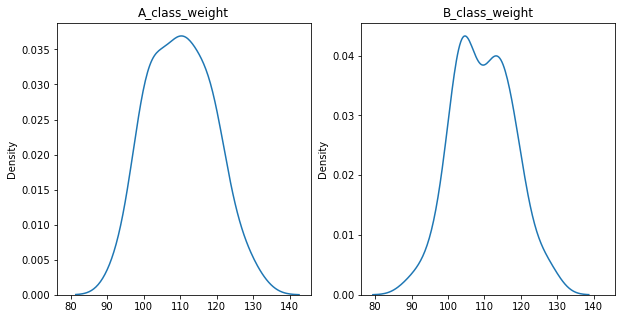

In [16]:
fig, axes = plt.subplots(1, 2,sharex=True,figsize=(10, 5))
sns.kdeplot(data=A_class_weight,ax=axes[0]).set(title="A_class_weight")
sns.kdeplot(data=B_class_weight,ax=axes[1]).set(title="B_class_weight")

In [19]:
print(A_class_weight.mean())

110.13333333333334


In [20]:
print(B_class_weight.mean())

109.55


## H0 : sample_mean_A= sample_mean_B

## H1 : sample_mean_A !=  sample_mean_B

## The test will be carried out with 95% confidence interval and 5% level of significance.

In [21]:
ttest,p_value=stats.ttest_ind(a=A_class_weight,b=B_class_weight,equal_var=False)

In [22]:
print(ttest)

0.379913627630679


In [23]:
print(p_value)

0.7046980532223062


In [24]:
if p_value < 0.05:   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


This test basically concludes that there is no difference in the samples

# Paired T-test

Paired t-test is to test whether 2 samples from same population are same or different.

For instance, a hospital might want to test whether a weight-gain drug works by checking the weights of the same group patients before and after treatment.

In [32]:
class_A_weight=[45,47,48,48,49,45,49,50,43,46,48]    #before taking drug
class_B_weight=[47,49,50,50,51,47,53,51,46,48,51]    #after taking drug

[Text(0.5, 1.0, 'B_class_weight')]

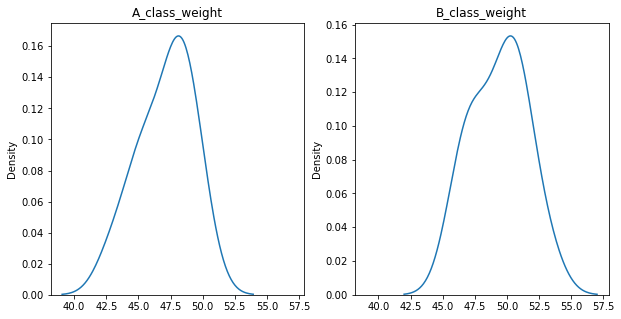

In [27]:
fig, axes = plt.subplots(1, 2,sharex=True,figsize=(10, 5))
sns.kdeplot(data=class_A_weight,ax=axes[0]).set(title="class_A_weight")
sns.kdeplot(data=class_B_weight,ax=axes[1]).set(title="class_B_weight")

## H0 : sample_mean_A= sample_mean_B

## H1 : sample_mean_A !=  sample_mean_B

## The test will be carried out with 95% confidence interval and 5% level of significance.

In [28]:
ttest,p_value=stats.ttest_rel(a=class_A_weight,b=class_B_weight)

In [29]:
ttest

-9.58706236059213

In [30]:
p_value

2.3363592951408468e-06

In [31]:
if p_value < 0.05:   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


This test concludes that there is a difference between the 2 samples